In [1]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, euclidean

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/word2vec.csv', header=None)
dataset = np.array(df.values)

# PCA

In [29]:
pca = PCA(n_components=0.90)
dataset_PCA = pca.fit_transform(dataset)
pca.n_components_

104

In [30]:
def kmeans_func():
    N = 5
    verbose = False

    km_PCA = KMeans(n_clusters=N, init='k-means++', max_iter=1200, n_init=3, n_jobs=6,
                    verbose=verbose)

    print("Clustering sparse data with {}".format(km_PCA))
    t0 = time()

    km_PCA.fit(dataset_PCA)
    print("done in {}s".format(time() - t0))
    return km_PCA

In [31]:
km_PCA = kmeans_func()
closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)
print(closest_PCA, distances_PCA)

while not (np.unique(closest_PCA).shape == closest_PCA.shape):
    km_PCA = kmeans_func()
    closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)

    print(closest_PCA, distances_PCA)

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.6939334869384766s
[ 455 1386  554 7987  219] [0.4610243  0.39691355 0.40443733 0.43646658 0.44054166]


In [32]:
silhouette_PCA = metrics.silhouette_score(dataset_PCA, km_PCA.labels_)

silhouette_PCA

0.005141070149465337

In [33]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

13229

In [34]:
for i in enumerate(closest_PCA):
#     print(i)
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: RT @CDCgov: CDC #Ebola experts have advised @EmoryUniversity Hospital there is no public health concern w/ release of these patients.

Cluster 1: RT @kellywallacetv: What's the advice when your child wants to stop a physical activity &amp; you know it's good for them to keep doing it? #fi…

Cluster 2: RT @drsanjaygupta: meet the doctor and get a first look at the room where ebola patients will be treated in the US.

Cluster 3: Blood sugar is NOT what matters most for preventing heart disease in people with #diabetes, new study finds

Cluster 4: Bently the dog has tested negative for #Ebola #Dallas city officials say. He's still in quarantine



In [65]:
labels = km_PCA.labels_
count = np.zeros(2).astype('int')

for i in np.unique(labels):
    count[0] = 0
    for j in labels:
        if j == i:
            print("Cluster {}: {}".format(j, health_lines[count[1]]))
            count[0] += 1
        count[1] += 1
        if count[0] == 5:
            break

Cluster 0: Nigeria is free of #Ebola transmission @WHO says

Cluster 0: Have you traveled to #Seattle lately? Health officials investigating #measles case at the airport:

Cluster 0: RT @CNNMoney: #CVSHealth cig ban begins today:

Cluster 0: RT @CNNMoney: Hospital network hacked, 4.5 million records stolen:

Cluster 0: Childhood mental health disabilities increased 21% over a 10-year period. Why?

Cluster 1: Antibiotics may mess w/ your baby's metabolism -- and other thing we learned from medical journals this week:

Cluster 1: RT @CEP_America: It’s like Uber, for house calls! @CNNHealth shares how some #apps are helping patients avoid long waits in the #ED:

Cluster 1: Remember when @CDCgov mixed a deadly flu strain &amp; a not-so-deadly flu strain? Here's what happened:

Cluster 1: @OliverPyatt Thank you for joining in!

Cluster 1: "How is someone supposed to be able to afford the help that everyone keeps saying is out there?" #depression chat:

Cluster 2: RT @CNNLiving: "It's hard t

In [36]:
run = True
if run:
    Nc = range(2, 20)

    kmeans = []
    score = []
    silhouettes = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i, n_init=3, n_jobs=i, max_iter=1200))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset_PCA).inertia_)
        silhouettes.append(metrics.silhouette_score(dataset_PCA, kmeans[i].labels_))

Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters
Fitting kmeans with 10 clusters
Fitting kmeans with 11 clusters
Fitting kmeans with 12 clusters
Fitting kmeans with 13 clusters
Fitting kmeans with 14 clusters
Fitting kmeans with 15 clusters
Fitting kmeans with 16 clusters
Fitting kmeans with 17 clusters
Fitting kmeans with 18 clusters
Fitting kmeans with 19 clusters


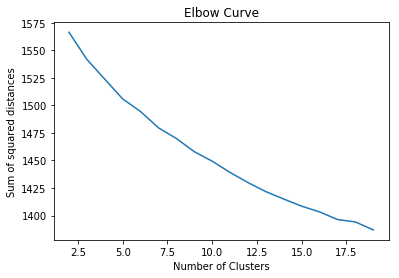

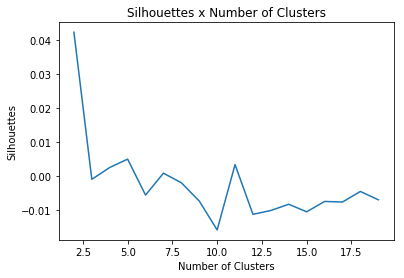

In [37]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()
    
    
    plt.plot(Nc,silhouettes)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Silhouettes')

    plt.title('Silhouettes x Number of Clusters')

    plt.show()